<h4>Importing Libraries</h4>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

<h4>Data Collection and Processing</h4>

In [3]:
gold_data = pd.read_csv("gld_price_data.csv")

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<h4>Getting the Statistical Measures of the Data</h4>

In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<h4>Correlation</h4>

In [10]:
correlation = gold_data.corr()

<AxesSubplot:>

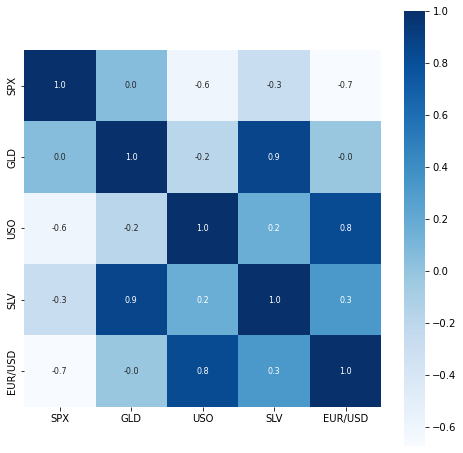

In [11]:
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8}, cmap = 'Blues')

In [12]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

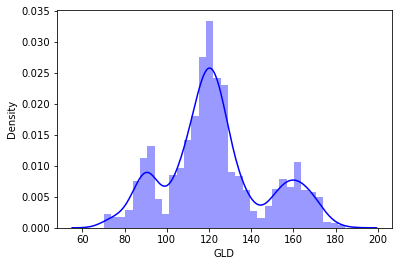

In [13]:
sns.distplot(gold_data['GLD'], color = 'blue')

<h4>Splitting the Features and the Target</h4>
<h6><i>In this GLD is the out put and SPX, SLV, EUR are the features</i></h6>

In [14]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [15]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


<h4>Splitting into Train and Test Data</h4>

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

<h4>Model Training</h4>


In [17]:
regressor = RandomForestRegressor(n_estimators = 100)

In [18]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

<h4>Model Estimation</h4>


In [19]:
test_data_predict = regressor.predict(X_test)
print(test_data_predict)

[168.37919895  81.90689985 115.99980002 127.70720044 120.62140145
 154.79659743 150.03229873 126.00900041 117.52939884 125.88910094
 116.57930106 171.9619006  141.44789803 167.78809797 115.14209989
 117.46720043 139.47850282 170.01180045 159.77720257 157.34949894
 155.0653998  125.50640028 176.40370005 157.27780339 125.21580058
  93.64259982  77.49180017 120.31870017 119.11359951 167.48739989
  88.1796006  125.40120015  91.09560082 117.64180004 121.16739934
 135.8451012  115.43430135 115.56800068 147.2519998  107.26740097
 104.58570221  86.99559785 126.48430013 117.82289966 154.08819921
 119.70990041 108.37290008 108.05189827  93.03990066 127.26079747
  74.93940004 113.58029926 121.28610041 111.30989914 119.08979898
 121.13709906 159.90969935 167.7614006  146.88619642  85.84819866
  94.4403002   86.80079858  90.58700005 118.75500065 126.37380091
 127.6144002  170.60829999 122.18159926 117.47509883  98.51990031
 168.12440203 143.14339877 132.06720209 121.17340202 121.59809943
 119.46720

<h4>Compare the actual and predicted values</h4>


In [20]:
error_score = metrics.r2_score(test_data_predict, Y_test)
print("R Squared Error is : ", error_score)

R Squared Error is :  0.9889310204444727


In [21]:
Y_test = list(Y_test)

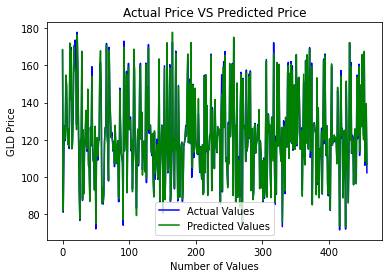

In [22]:
plt.plot(Y_test, color= 'blue', label = "Actual Values")
plt.plot(test_data_predict, color ='green', label= "Predicted Values")
plt.title("Actual Price VS Predicted Price")
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

<h4>Pickling the Model File for Deployment</h4>

In [27]:
import pickle
pickle.dump(RandomForestRegressor, open('regressor.pkl','wb'))

In [28]:
pickeled_model = pickle.load(open('regressor.pkl', 'rb'))

In [30]:
y = pickeled_model.predict(X_test)
print(y)

TypeError: predict() missing 1 required positional argument: 'X'